# Flight Price Prediction Project

Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

Downlaod Files:                                               
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects

In [186]:
import pandas as pd
df=pd.read_csv("Flight Price Prediction Project(train data).csv")

In [187]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [188]:
#checking null values in the dataframe
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

we see that two vull value is present in the data.

In [189]:
#checking shape of the dataframe
df.shape

(10683, 11)

our dataframe has 10683 rows and 11 columns.It means we have 10683 flight's 11 type of data.

# Exploratory Data Analysis(EDA)

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [191]:
#checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


<AxesSubplot:>

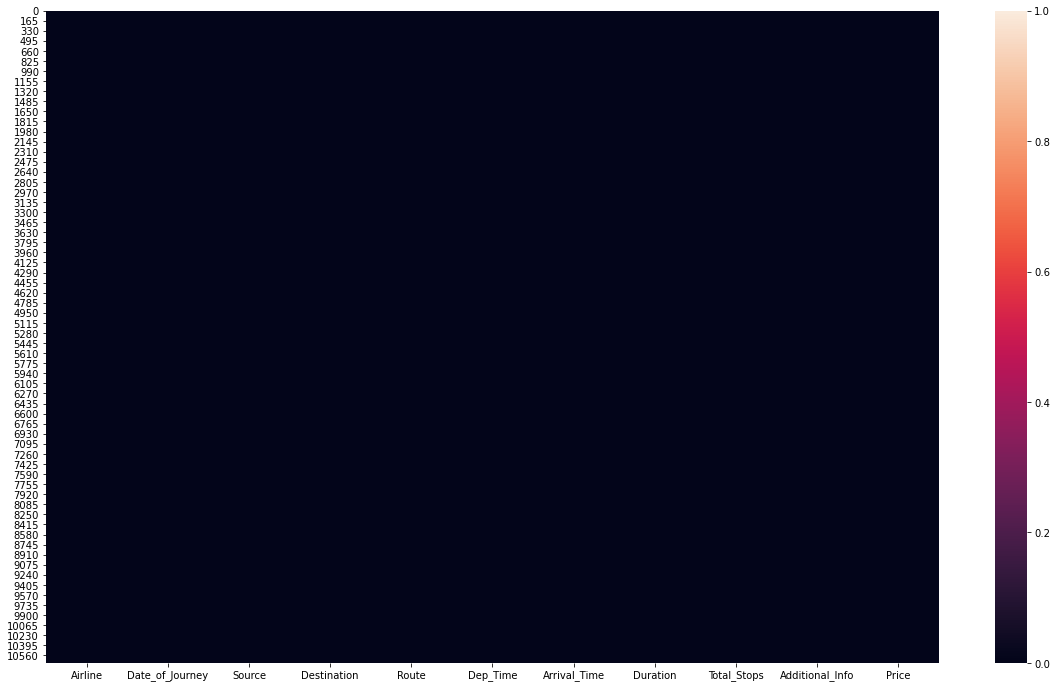

In [192]:
#checking null values using heatmap
plt.figure(figsize=(20,12))
sns.heatmap(df.isnull())

Since we have lot of flight's data, we can't see the missing values

Now we drop the rows that represent the missing values

In [193]:
#Checking Missing values of Route column
df[df["Route"].isnull()== True]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [194]:
#drop the missing values
df=df.drop(9039,axis=0)

In [195]:
#check again missing values of the Route column
df[df["Route"].isnull()== True]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [196]:
#Checking Missing Values of Total_Stops column
df[df["Total_Stops"].isnull()== True]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [197]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

we can see that missing values of two columns present in the same row.

In [198]:
#checking shape
df.shape

(10682, 11)

In [199]:
#checking columns name of the DataFrame
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

Now we divide all the columns into categorical and numerical types

In [200]:
df.dtypes.index

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [201]:
# checking for categorical columns
categorical_columns=[]
index_c=[]
m=0
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
        index_c.append(m)
    m=m+1
print(categorical_columns)
print(index_c)

['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [202]:
len(categorical_columns)

10

In [203]:
# now checking for numerical columns
numerical_columns=[]
index_n=[]
m=0
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
        index_n.append(m)
    m=m+1
print(numerical_columns)
print(index_n)

['Price']
[10]


We only have one numeric column which is our target column.others are categorical column.

# Univariate Analysis:

Categorical Column:

column Name: Airline


Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
len= 12
#############################################################################################################################


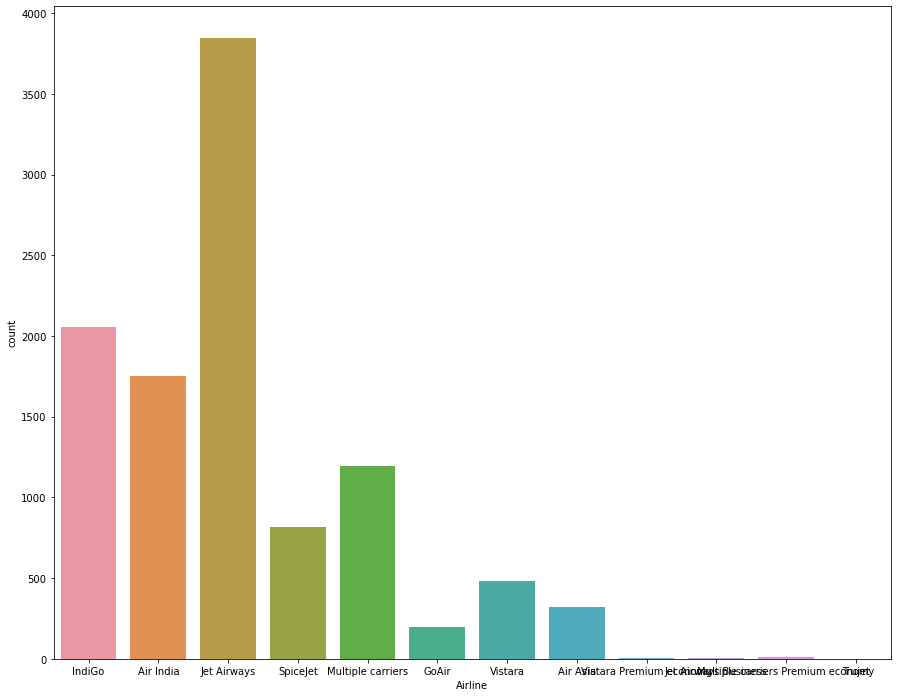

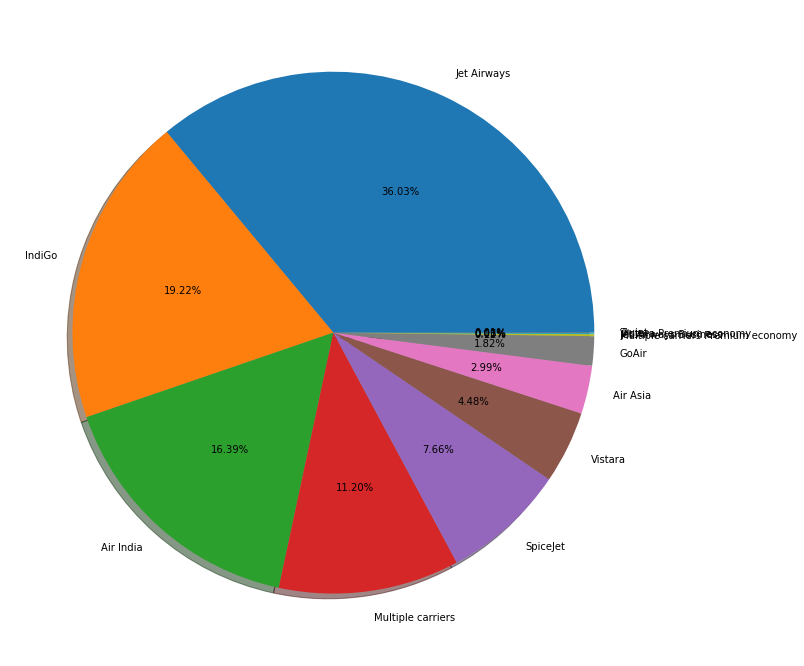

In [204]:
i=0 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(15,12))
sns.countplot(df[df.columns[i]])
print("#"*125)
plt.figure(figsize=(15,12))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')

we have most of the data of Jet Airways airlines and very few data of Multiple carriers Premium economy,Jet Airways Business,Vistara Premium economy,Trujetn Airlines

column Name: Date_of_Journey


18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64
len= 44
#############################################################################################################################


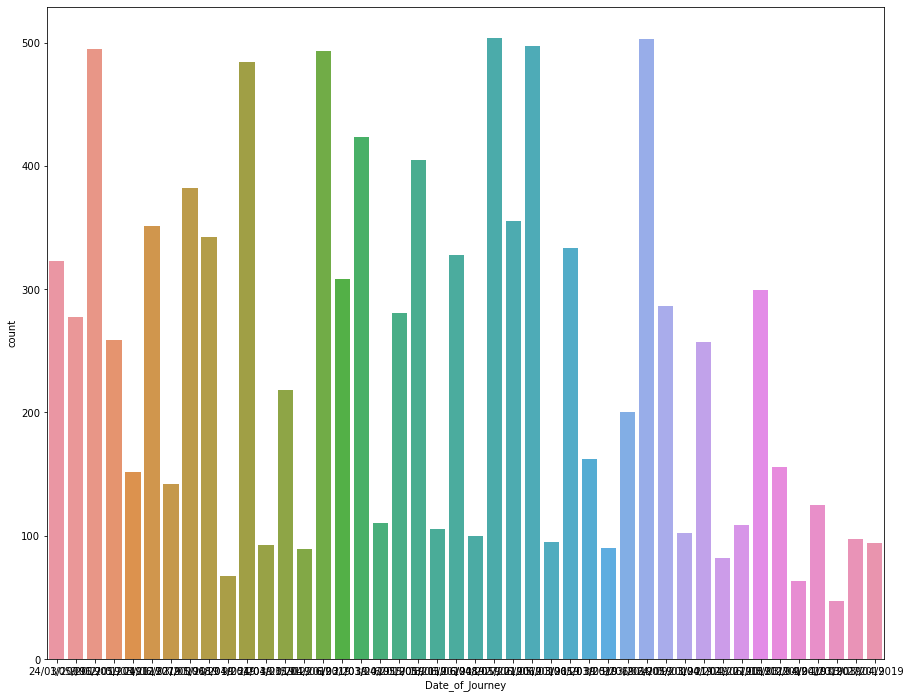

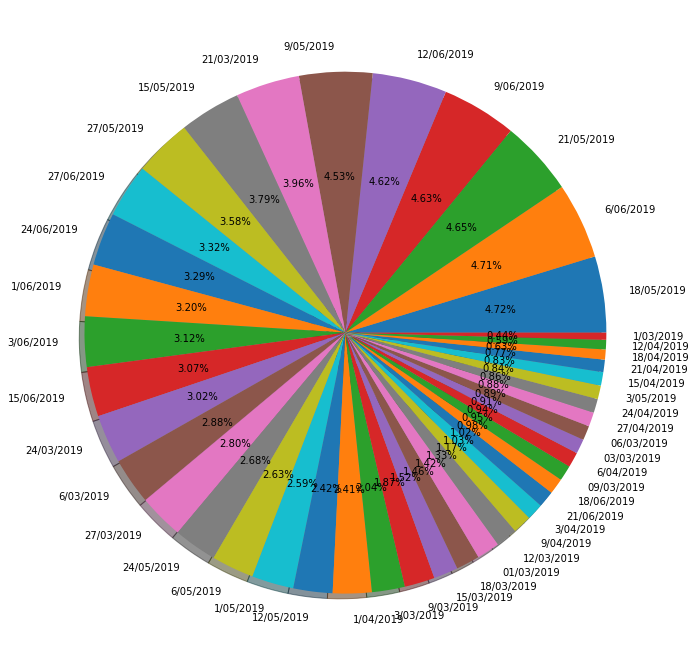

In [205]:
i=1 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(15,12))
sns.countplot(df[df.columns[i]])
print("#"*125)
plt.figure(figsize=(15,12))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')

We can see that all the data of the flight is from 2019

we just take month of the data and make a column.
after this, we drop the Date of Journey column from the DataFrame

In [206]:
df["Journey_Month"]=pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y").dt.month

In [207]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,4
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,4
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,4
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,3


In [208]:
df["Journey_Month"].dtype

dtype('int64')

In [209]:
#append "Date_of_Journey" column in drop_columns list
drop_columns=[]
drop_columns.append("Date_of_Journey")

In [210]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3


column Name: Source


Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
len= 5
#############################################################################################################################


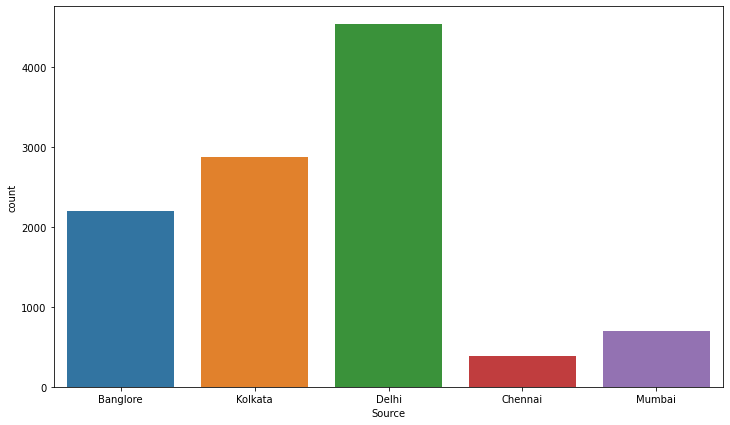

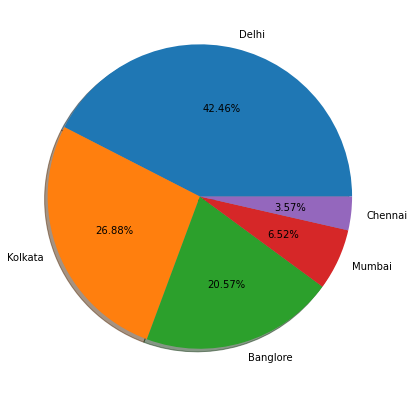

In [211]:
i=2 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
print("#"*125)
plt.figure(figsize=(12,7))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')

In [212]:
#43% source is from Delhi

#27% source is from Kolkata

#21%sorce is from Bangalore

#10% source is from Mimbai and chennai

column Name: Destination


Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
len= 6
#############################################################################################################################


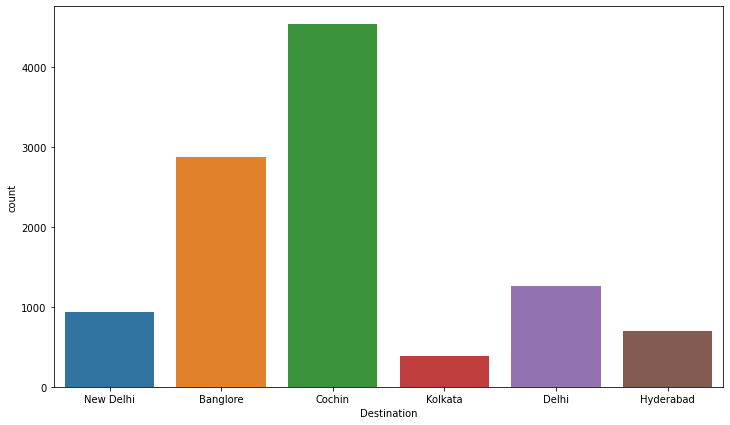

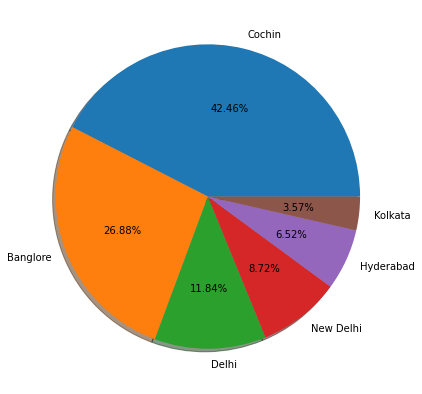

In [213]:
i=3 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
print("#"*125)
plt.figure(figsize=(12,7))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')

we can see that most of the flights destination is Cochin

In [214]:
df.shape

(10682, 12)

In [215]:
list1=[]
for i in range(0,9039):
    pq=df["Route"][i].split("?")
    for j in pq:
        list1.append(j)
        
        
for i in range(9040,10682): # we droped 9039th row for missing value 
    pq=df["Route"][i].split("?")
    for j in pq:
        list1.append(j)

In [216]:
list2 = list(dict.fromkeys(list1))
print(list2)

TypeError: 'list' object is not callable

In [217]:
len(list2)

52

we can see that there are 52 unique spots in Routs column.

column Name: Route


DEL ? BOM ? COK                2376
BLR ? DEL                      1552
CCU ? BOM ? BLR                 979
CCU ? BLR                       724
BOM ? HYD                       621
                               ... 
BLR ? BOM ? IXC ? DEL             1
BOM ? CCU ? HYD                   1
BOM ? UDR ? DEL ? HYD             1
BOM ? BBI ? HYD                   1
BOM ? JDH ? JAI ? DEL ? HYD       1
Name: Route, Length: 128, dtype: int64


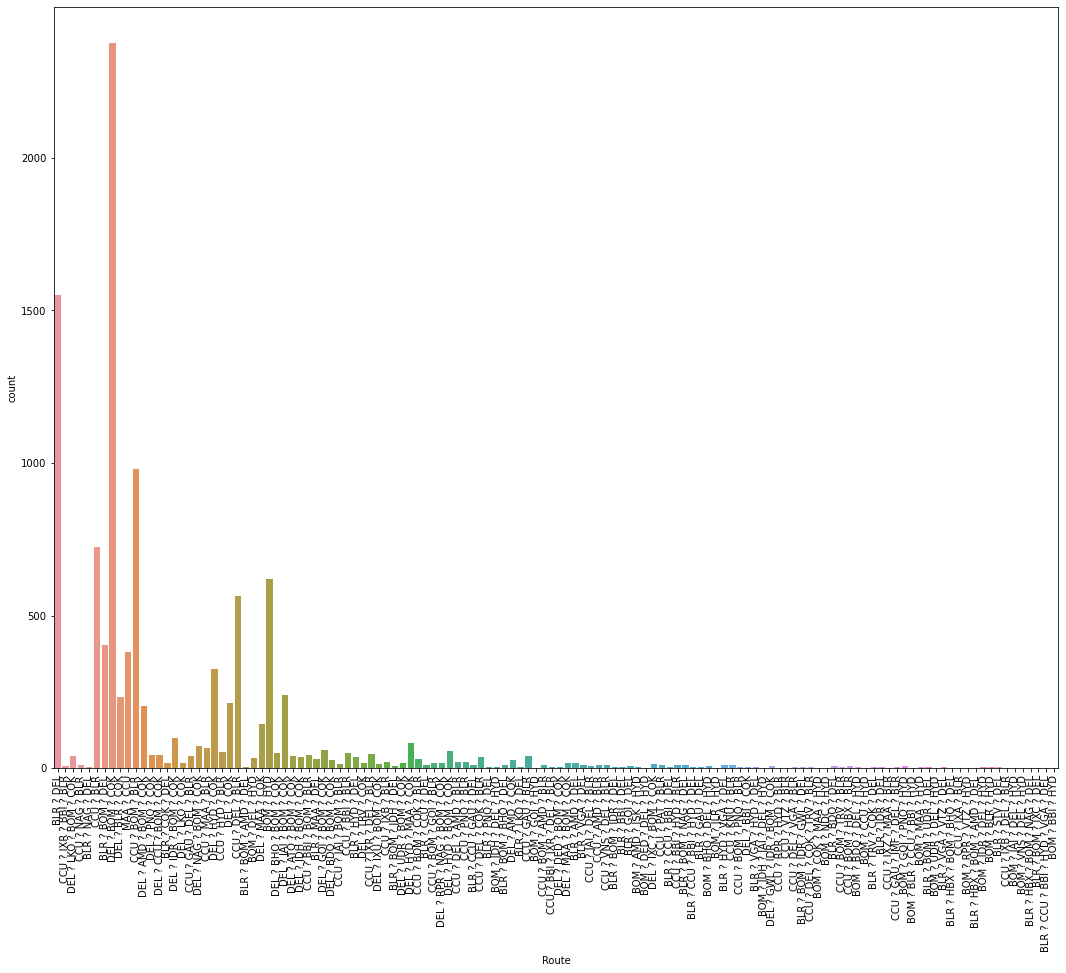



###############################################################################################################################


In [218]:
i=4 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(18,14))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*127)

column Name: Dep_Time


18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
12:45      1
03:00      1
04:50      1
01:35      1
22:25      1
Name: Dep_Time, Length: 222, dtype: int64


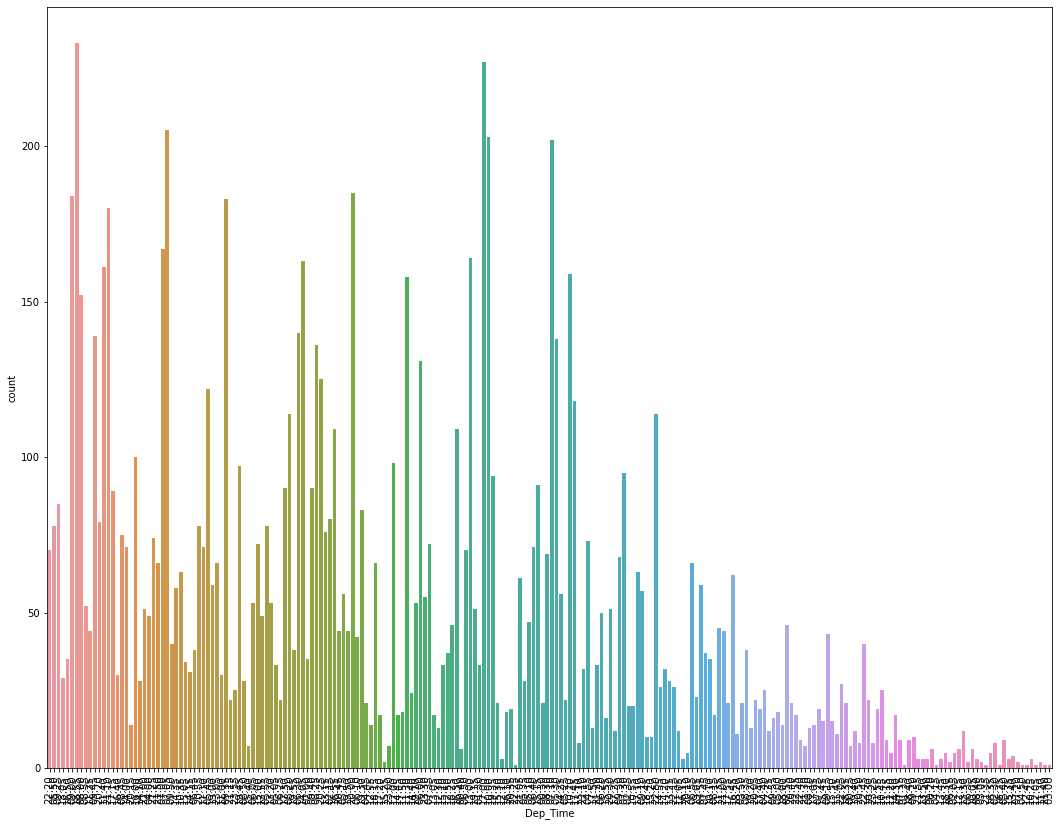



###############################################################################################################################


In [219]:
i=5 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(18,14))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*127)

column Name: Arrival_Time


19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
04:25 02 May      1
00:40 07 Mar      1
11:10 16 Mar      1
14:35 19 May      1
00:45 03 Mar      1
Name: Arrival_Time, Length: 1343, dtype: int64


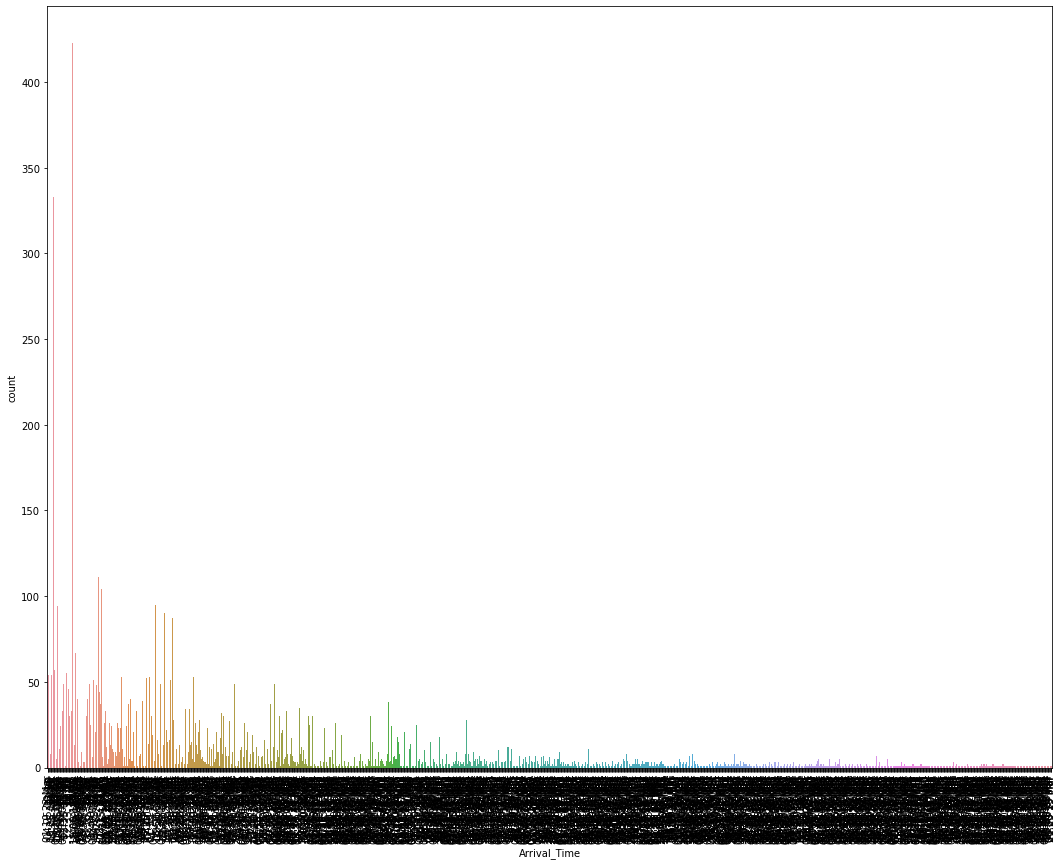



###############################################################################################################################


In [220]:
i=6 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(18,14))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*127)

column Name: Duration


2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
27h 55m      1
19h 50m      1
31h 50m      1
36h 25m      1
32h 20m      1
Name: Duration, Length: 368, dtype: int64


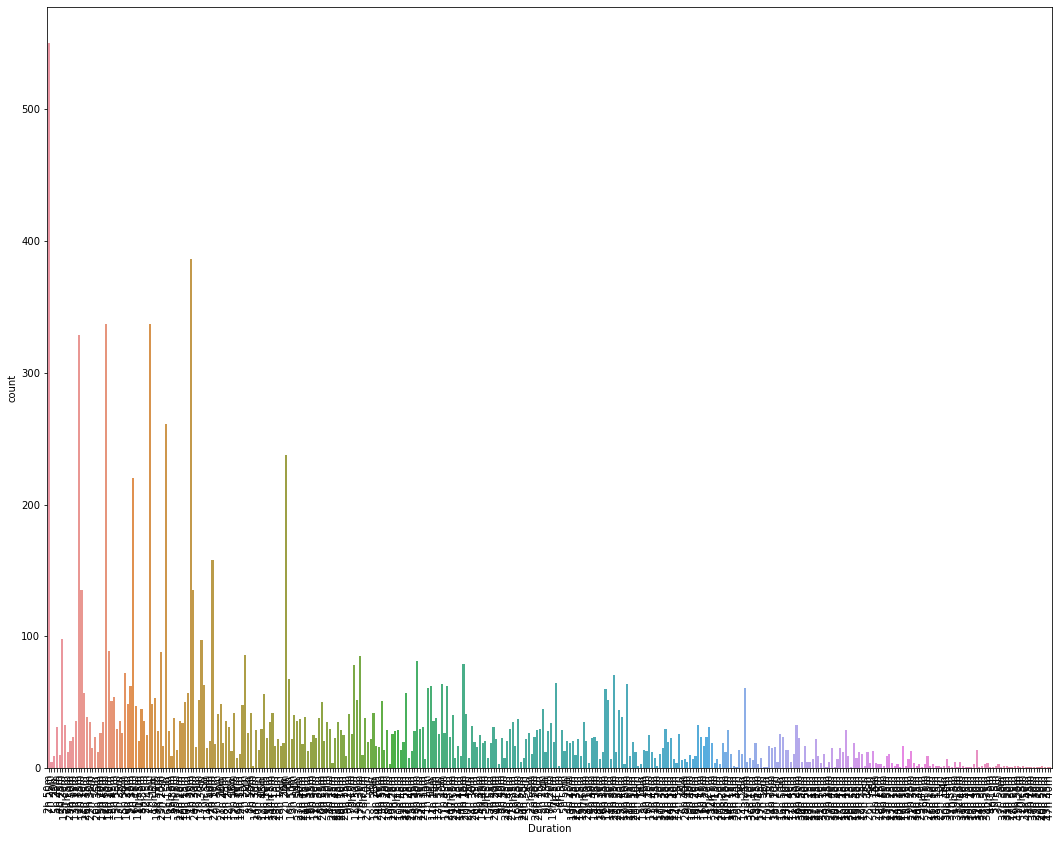



###############################################################################################################################


In [221]:
i=7 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(18,14))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*127)

Since we have Duration of every flight journey,we will drop Dep_Time and Arrival_Time columns

In [222]:
#append "Duration" column in drop_columns list
drop_columns.append("Dep_Time")
drop_columns.append("Arrival_Time")

In [223]:
#duration time converting into minute

In [224]:
D=[]
for i in range(9039):
    du=df["Duration"][i].replace('m','').replace(' ','').split('h')
    
    x=float(du[0].replace('h',''))
    if len(du)==1:
        y=0
    else:
        if type(du[1])==str:
            y=0
        else:
            y=float(du[1])
        
    D.append(x*60 + y)

    
for i in range(9040,10683):
    du=df["Duration"][i].replace('m','').replace(' ','').split('h')
    
    x=float(du[0].replace('h',''))
    if len(du)==1:
        y=0
    else:
        if type(du[1])==str:
            y=0
        else:
            y=float(du[1])
        
    D.append(x*60 + y)

In [225]:
D

[120.0,
 420.0,
 1140.0,
 300.0,
 240.0,
 120.0,
 900.0,
 1260.0,
 1500.0,
 420.0,
 780.0,
 120.0,
 120.0,
 720.0,
 120.0,
 1560.0,
 240.0,
 1320.0,
 1380.0,
 1200.0,
 300.0,
 900.0,
 120.0,
 120.0,
 780.0,
 900.0,
 300.0,
 300.0,
 120.0,
 120.0,
 120.0,
 780.0,
 120.0,
 1320.0,
 300.0,
 600.0,
 300.0,
 120.0,
 360.0,
 660.0,
 660.0,
 480.0,
 1320.0,
 120.0,
 720.0,
 120.0,
 120.0,
 120.0,
 960.0,
 1140.0,
 180.0,
 1500.0,
 120.0,
 180.0,
 120.0,
 960.0,
 900.0,
 120.0,
 360.0,
 1500.0,
 720.0,
 1620.0,
 600.0,
 600.0,
 120.0,
 600.0,
 120.0,
 60.0,
 780.0,
 120.0,
 60.0,
 1560.0,
 420.0,
 780.0,
 300.0,
 120.0,
 120.0,
 60.0,
 1140.0,
 120.0,
 840.0,
 120.0,
 1320.0,
 540.0,
 600.0,
 1260.0,
 300.0,
 1080.0,
 720.0,
 1080.0,
 540.0,
 660.0,
 1020.0,
 780.0,
 120.0,
 120.0,
 120.0,
 180.0,
 60.0,
 960.0,
 720.0,
 720.0,
 420.0,
 1440.0,
 120.0,
 480.0,
 420.0,
 840.0,
 1800.0,
 1140.0,
 900.0,
 120.0,
 720.0,
 600.0,
 300.0,
 900.0,
 960.0,
 600.0,
 120.0,
 660.0,
 120.0,
 60.0,
 840.0

In [226]:
len(D)

10682

In [227]:
df['Duration(minute)']=D

In [228]:
#now we check the distribution curve of our new column

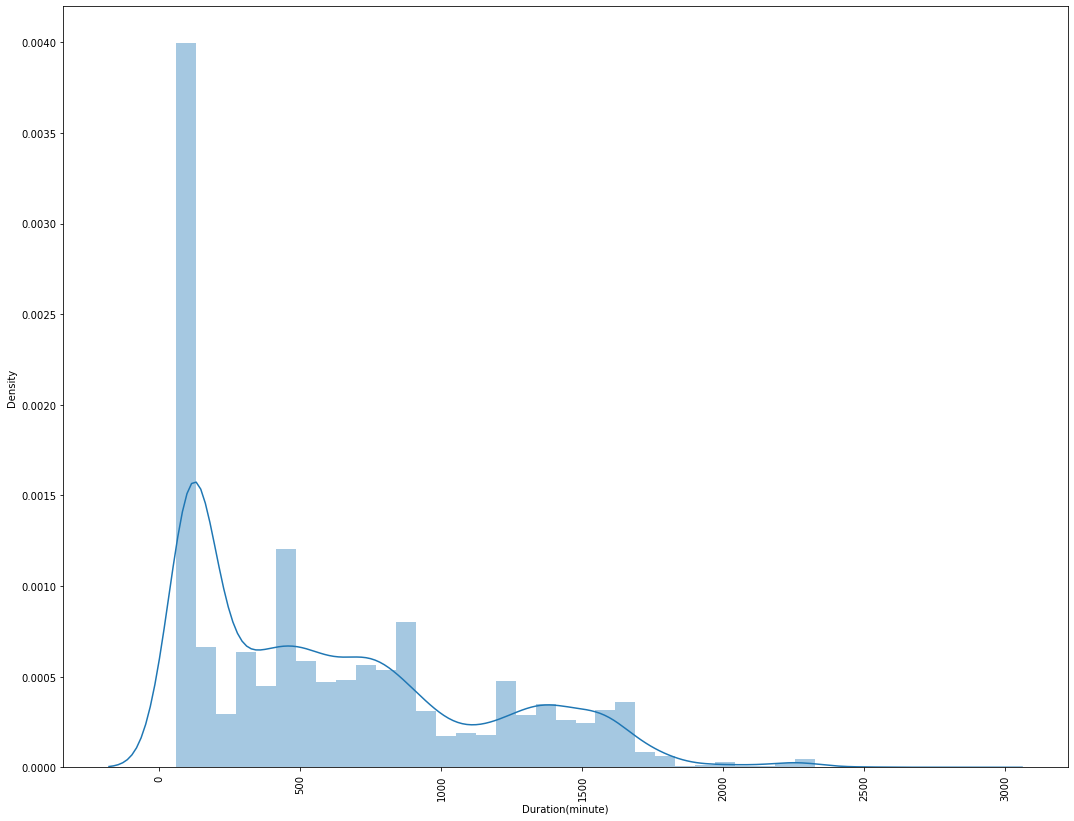



###############################################################################################################################


In [229]:
plt.figure(figsize=(18,14))
sns.distplot(df["Duration(minute)"])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*127)

we can see that posetive skewness present in the curve

now we don't need Duration column.so,we drop it.

In [230]:
#append "Duration" column in drop_columns list
drop_columns.append("Duration")

column Name: Total_Stops


1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64
len= 5
#############################################################################################################################


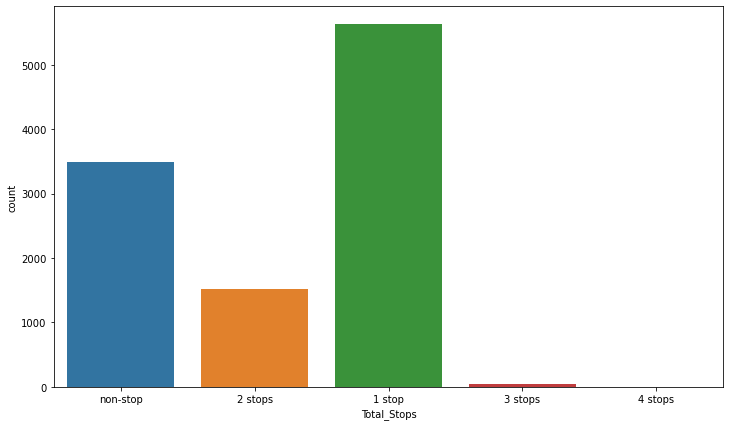

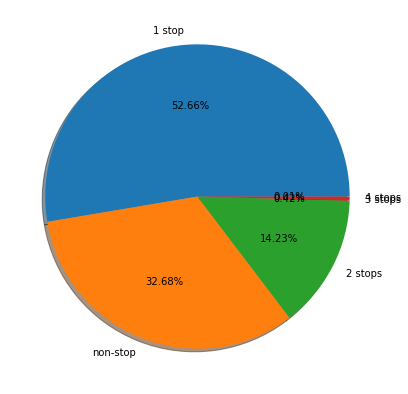

In [231]:
i=8 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
print("#"*125)
plt.figure(figsize=(12,7))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')

column Name: Additional_Info


No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64
len= 10
#############################################################################################################################


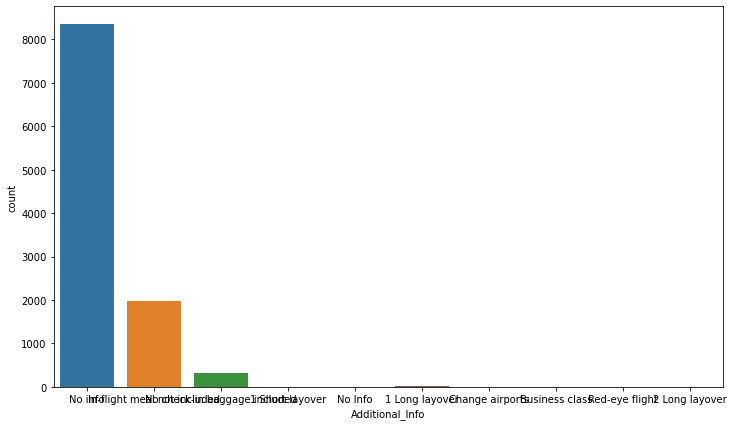

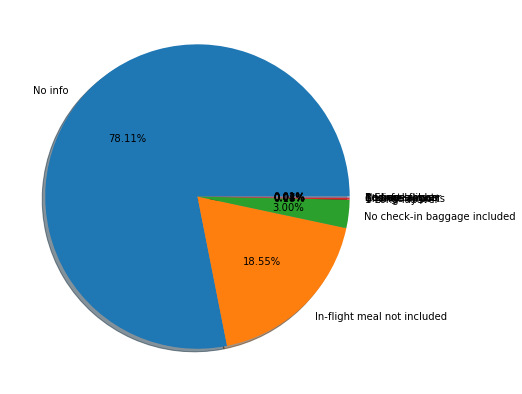

In [232]:
i=9 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
print("#"*125)
plt.figure(figsize=(12,7))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')

we can see that additional information of most flight is missing.

we can see that there are two type "no info" present in the column for some typing mistake.we have to fix it.

In [233]:
df[df['Additional_Info']=='No Info']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Duration(minute)
795,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? HYD ? DEL,16:55,21:50,4h 55m,1 stop,No Info,8153,3,240.0
2212,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? HYD ? DEL,16:15,20:35,4h 20m,1 stop,No Info,7917,3,240.0
9220,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? HYD ? DEL,05:15,10:00,4h 45m,1 stop,No Info,8064,3,240.0


In [234]:
list3=[795,2212,9220]
for i in list3:
    df["Additional_Info"][i]='No info'

In [235]:
df[df['Additional_Info']=='No Info']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Duration(minute)


column Name: Additional_Info


No info                         8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64


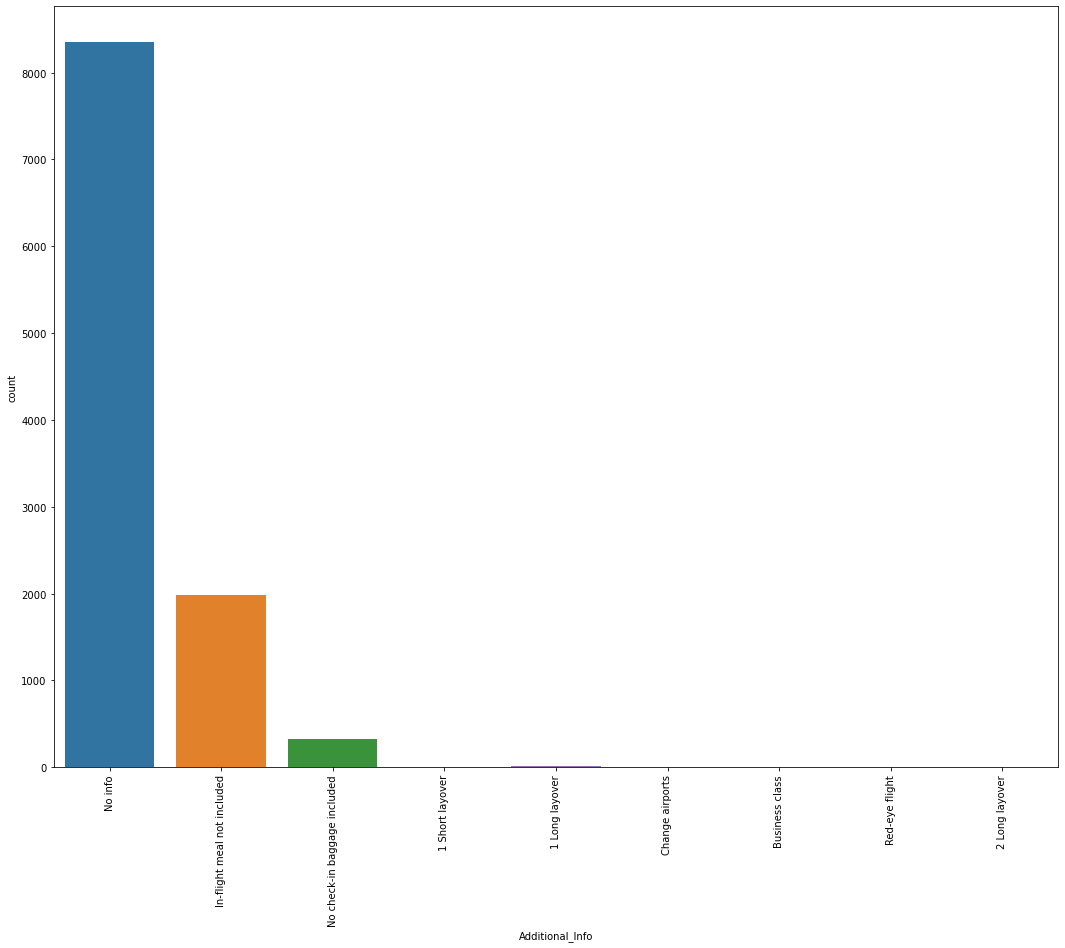



###############################################################################################################################


In [236]:
i=-4 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(18,14))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*127)

we fixed the problem of two type 'no info' value 

column Name: Price


10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
16946      1
10783      1
14861      1
10759      1
4098       1
Name: Price, Length: 1870, dtype: int64


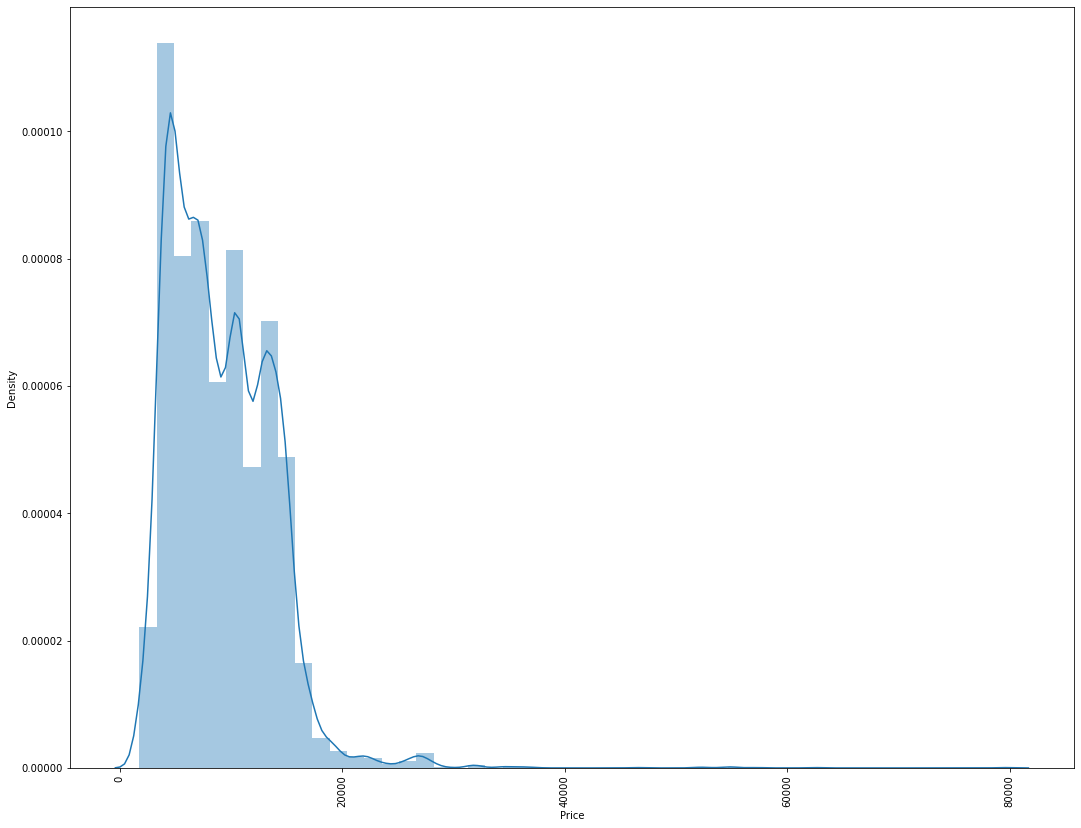



###############################################################################################################################


In [237]:
i=10 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(18,14))
sns.distplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*127)

above plot showws the ditribution curve of our target columns.                         
the curve is not like normal distribution curve.posetive skewness present in the data

# Bivariate Analysis:

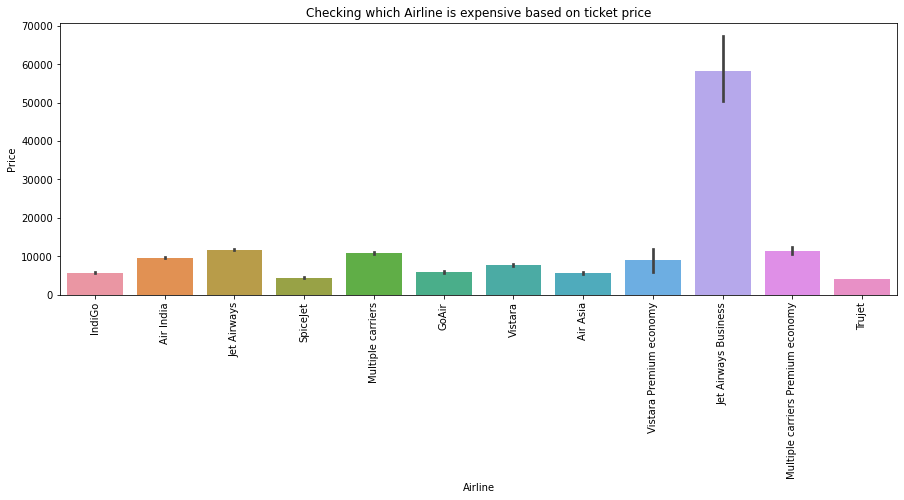

In [243]:
plt.figure(figsize=(15,5))
sns.barplot(df["Airline"],df["Price"],data=df)
plt.title("Checking which Airline is expensive based on ticket price")
plt.xticks(rotation=90)
plt.show()

In [239]:
#The bar plot shows that the Jet Airways is most expensive Airline followed by Multiple carries and Air India

#The Trujet and Spicejet have very cheap ticket prices compared to others.

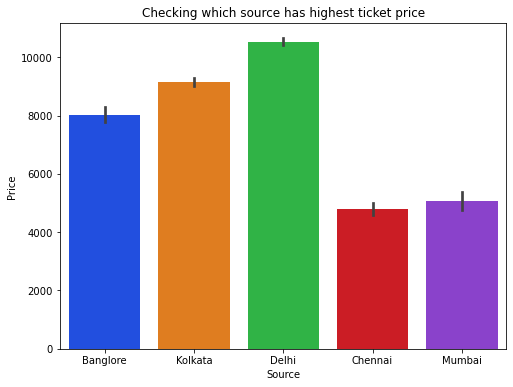

In [240]:
plt.figure(figsize=(8,6))
sns.barplot(df["Source"],df["Price"],data=df,palette="bright")
plt.title("Checking which source has highest ticket price")
plt.show()

In [241]:
#The tickets prices are expensive in Delhi region compared to others and price is cheaper in Chennai and Mumbai sources

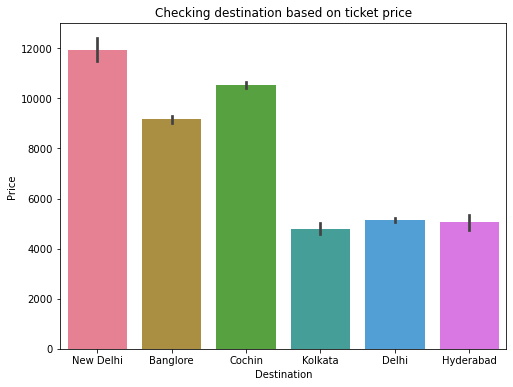

In [244]:
plt.figure(figsize=(8,6))
sns.barplot(df["Destination"],df["Price"],data=df,palette="husl")
plt.title("Checking destination based on ticket price")
plt.show()

In [245]:
#The ticket price is high in Delhi destination followed by Bangalore which means they have long distance from the source.

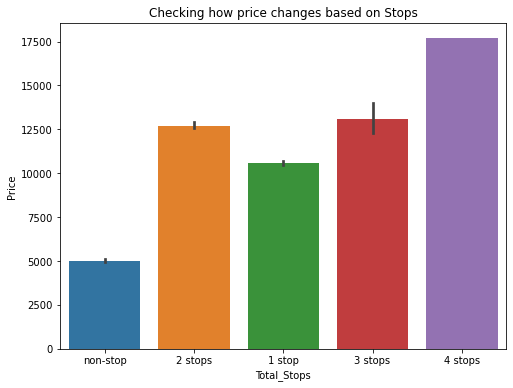

In [246]:
plt.figure(figsize=(8,6))
sns.barplot(df["Total_Stops"],df["Price"],data=df)
plt.title("Checking how price changes based on Stops")
plt.show()

In [247]:
#Here the flights with 4 stops have highest price followed by flights having 3 stops and the flights which have no stops is having very less ticket price compared to others.

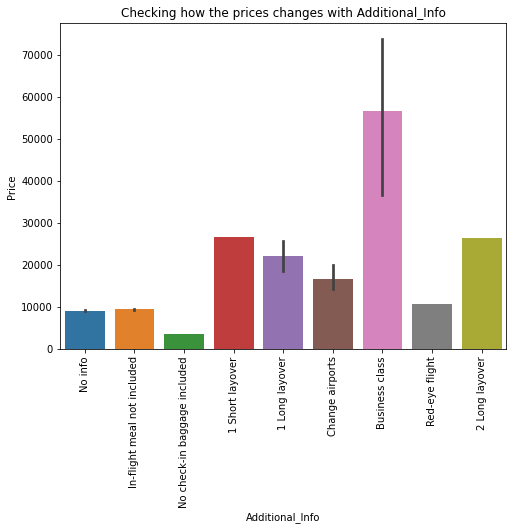

In [248]:
plt.figure(figsize=(8,6))
sns.barplot(df["Additional_Info"],df["Price"],data=df)
plt.title("Checking how the prices changes with Additional_Info")
plt.xticks(rotation=90)
plt.show()

The plot shows that the Business class fights are more expensive compared to others and the flights having the class No check-in baggage included has very least ticket price.

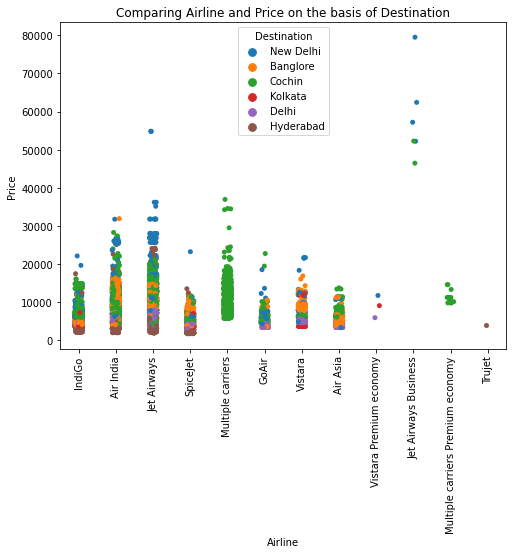

In [251]:
# checking how the price pays role in Airline on the basis of destination
plt.figure(figsize=(8,6))
sns.stripplot(x=df['Airline'],y=df['Price'],hue=df['Destination'])
plt.title("Comparing Airline and Price on the basis of Destination")
plt.xticks(rotation=90)
plt.show()

In [252]:
#Here we can conclude that the Jet Airways flights that are destined to Delhi are have more expensive ticket prices compared to others

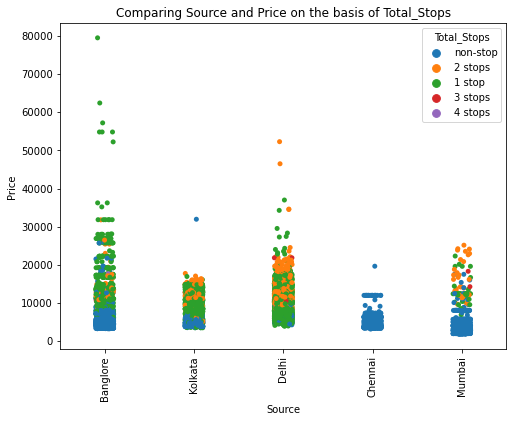

In [254]:
# checking how the price pays role in Source on the basis of Total_Stops
plt.figure(figsize=(8,6))
sns.stripplot(x=df['Source'],y=df['Price'],hue=df['Total_Stops'])
plt.title("Comparing Source and Price on the basis of Total_Stops")
plt.xticks(rotation=90)
plt.show()

In [255]:
#As we can notice that the flights in the Banglore source which have only one stop between source and destination have very expensive ticket price and the flights in Chennai with no stops have very cheap prices compared to other source flights.

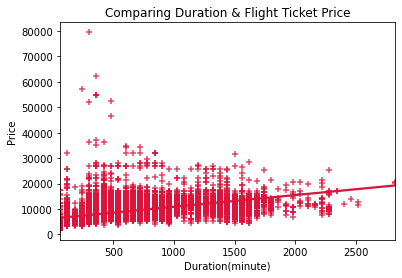

In [260]:
plt.title("Comparing Duration & Flight Ticket Price")
sns.regplot(x= df['Duration(minute)'],y= df['Price'],marker="+",color='crimson')
plt.show()

In [ ]:
# From the reg plot we can observe some positive linear relation between Duration and Price.

# Multivariate Analysis:

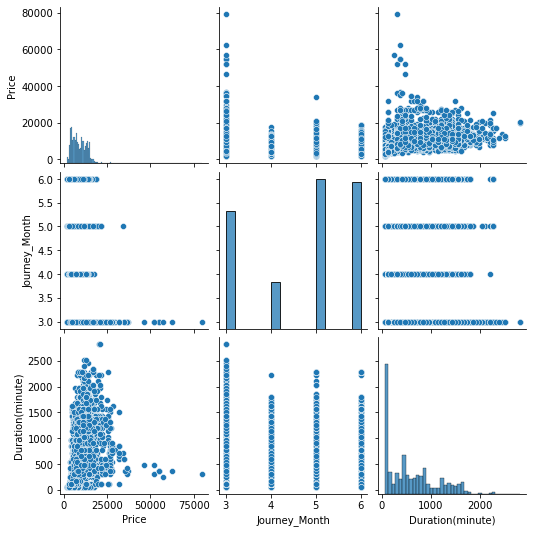

In [257]:
sns.pairplot(df,palette="gnuplot2")
plt.show()

In [ ]:
#we have only three numerical columns.
#We can see that there is no pair as closely related to each other.

In [54]:
#now we drop that column which i stored in drop_columns list

In [55]:
df=df.drop(drop_columns,axis=1)

In [56]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Month,Duration(minute)
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,3,120.0
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,5,420.0
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,6,1140.0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,5,300.0
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,3,240.0
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,non-stop,No info,4107,4,120.0
10679,Air India,Kolkata,Banglore,CCU ? BLR,non-stop,No info,4145,4,120.0
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,non-stop,No info,7229,4,180.0
10681,Vistara,Banglore,New Delhi,BLR ? DEL,non-stop,No info,12648,3,120.0


In [57]:
#describing the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10682.0,9087.214567,4611.548810,1759.0,5277.0,8372.0,12373.0,79512.0
Journey_Month,10682.0,4.708575,1.164408,3.0,3.0,5.0,6.0,6.0
Duration(minute),10682.0,614.721962,509.669337,60.0,120.0,480.0,900.0,2820.0


we have only two numerical columns                                         
-Price                                                             
-Duration(minute)                                       
                                           
                                                                                      
journey month is not numerical column                                                          

In [58]:
#Checking Correlation
df.corr()

,Price,Journey_Month,Duration(minute)
Price,1.000000,-0.103643,0.508902
Journey_Month,-0.103643,1.000000,0.016061
Duration(minute),0.508902,0.016061,1.000000


correlation between price and duration(minute) is 0.51.It is consider as a good correlation. 

journey_month is a categorical type column but in data, it is used as a numerical column.

Since we have only one numerical column besides the target column,we will not check VIF score.

# Checking Outliers:

In [59]:
list_o=['Price','Duration(minute)']

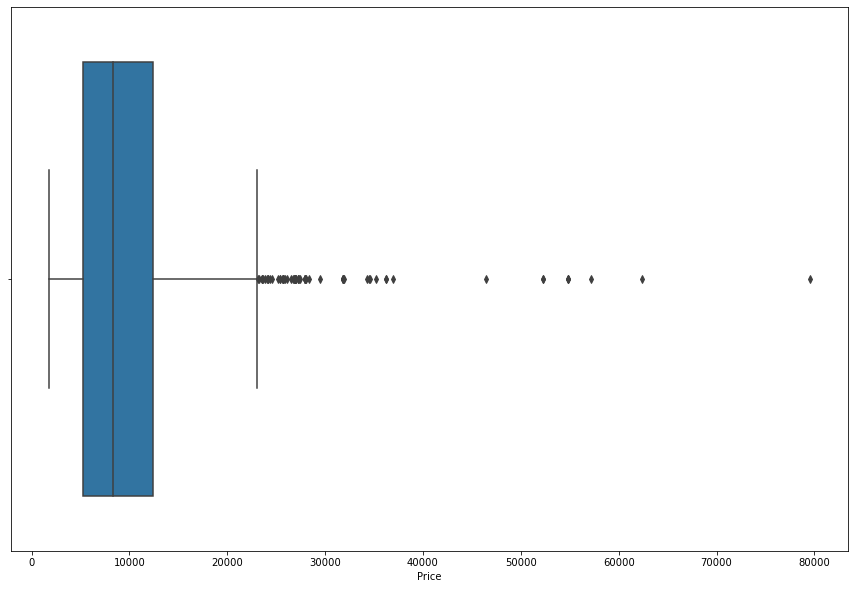

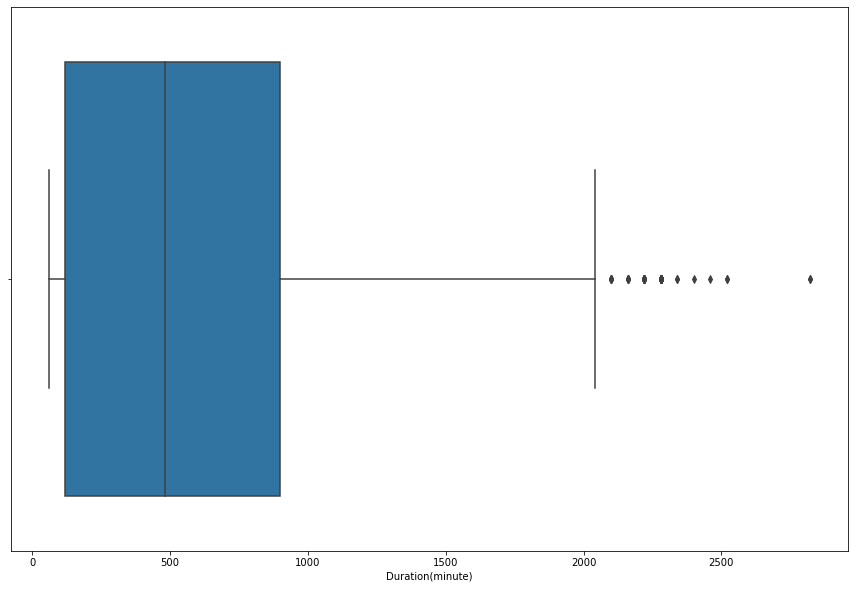

In [60]:
for i in list_o:
    plt.figure(figsize=(15,10))
    sns.boxplot(df[i])
    plt.show()

we can see that there are lot of outliers in our target column and few outliers are present in Duratuion(minute) column

# Remove Outliers using zscore:

In [65]:
#import zscore
from scipy.stats import zscore
import numpy as np

In [66]:
outliers_columns=df[['Price','Duration(minute)']]

In [67]:
z=np.abs(zscore(outliers_columns))
z

array([[1.12553455, 0.97071784],
       [0.30906781, 0.38207336],
       [1.03978296, 1.0306734 ],
       ...,
       [0.40296691, 0.85298895],
       [0.77218138, 0.97071784],
       [0.57809433, 0.26434447]])

In [68]:
threshold=3
print(np.where(z>3))

(array([  123,   226,   396,   486,   510,   553,   597,   628,   657,
         785,   826,   936,   946,   959,   966,   969,   975,  1067,
        1113,  1196,  1246,  1341,  1346,  1424,  1442,  1466,  1478,
        1496,  1551,  1629,  1654,  1657,  1785,  1791,  1804,  1918,
        2055,  2099,  2108,  2172,  2495,  2553,  2556,  2618,  2635,
        2641,  2654,  2693,  2718,  2924,  3032,  3111,  3257,  3400,
        3457,  3535,  3700,  3790,  3815,  3966,  4012,  4047,  4118,
        4463,  4521,  4655,  4676,  4829,  5013,  5136,  5372,  5439,
        5516,  5662,  5701,  5701,  5710,  5711,  5719,  5738,  5745,
        5782,  5856,  5933,  5953,  5986,  6059,  6085,  6314,  6321,
        6407,  6476,  6576,  6588,  6605,  6884,  6991,  7189,  7232,
        7306,  7329,  7351,  7356,  7377,  7537,  7553,  7554,  7611,
        7612,  7617,  7713,  7724,  7756,  7876,  7902,  7906,  8020,
        8080,  8127,  8153,  8360,  8409,  8412,  8451,  8470,  8536,
        8598,  8601

In [69]:
df_new=df[(z<3).all(axis=1)]
df_new

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Month,Duration(minute)
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,3,120.0
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,5,420.0
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,6,1140.0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,5,300.0
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,3,240.0
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,non-stop,No info,4107,4,120.0
10679,Air India,Kolkata,Banglore,CCU ? BLR,non-stop,No info,4145,4,120.0
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,non-stop,No info,7229,4,180.0
10681,Vistara,Banglore,New Delhi,BLR ? DEL,non-stop,No info,12648,3,120.0


In [70]:
list_ro=['Price','Duration(minute)']

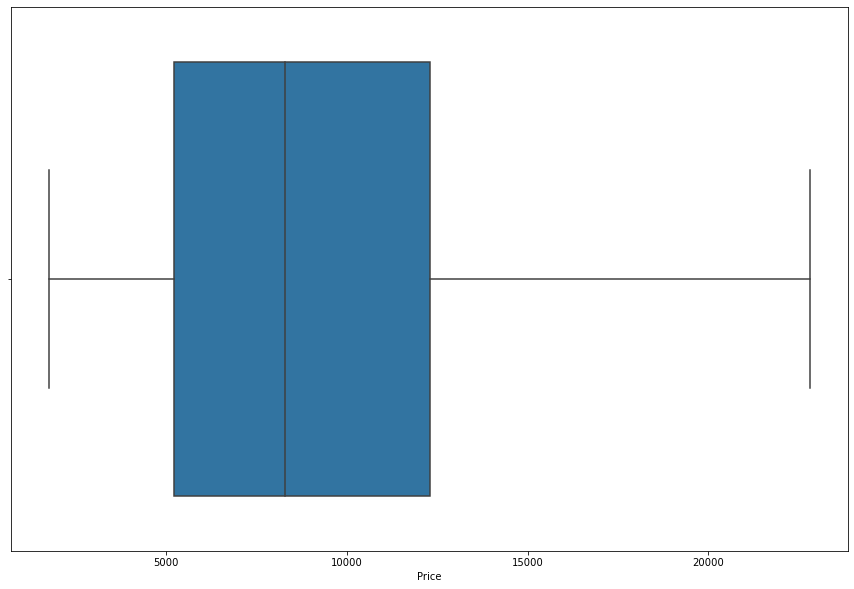

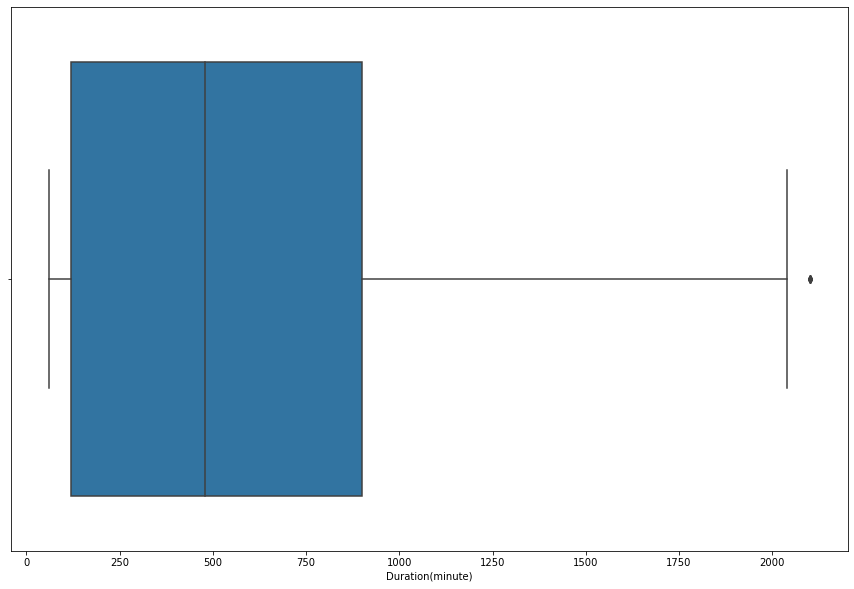

In [71]:
for i in list_ro:
    plt.figure(figsize=(15,10))
    sns.boxplot(df_new[i])
    plt.show()

we can see that all outliers was removed.

In [72]:
print(df.shape)
print(df_new.shape)

(10682, 9)
(10521, 9)


In [73]:
percentage_of_dataloss=((10682-10521)/10682)*100
print("percentage of dataloss =",percentage_of_dataloss)

percentage of dataloss = 1.507208387942333


# LabelEncoding:

In [74]:
df.nunique().to_frame('unique values')

,unique values
Airline,12
Source,5
Destination,6
Route,128
Total_Stops,5
Additional_Info,9
Price,1870
Journey_Month,4
Duration(minute),43


In [82]:
list=["Airline","Source","Destination","Route","Total_Stops","Additional_Info"]

In [83]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list:
    df_new[i]=le.fit_transform(df_new[i]).astype(float)

In [84]:
df_new

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Month,Duration(minute)
0,3.0,0.0,5.0,18.0,4.0,4.0,3897,3,120.0
1,1.0,3.0,0.0,81.0,1.0,4.0,7662,5,420.0
2,4.0,2.0,1.0,115.0,1.0,4.0,13882,6,1140.0
3,3.0,3.0,0.0,88.0,0.0,4.0,6218,5,300.0
4,3.0,0.0,5.0,29.0,0.0,4.0,13302,3,240.0
...,...,...,...,...,...,...,...,...,...
10678,0.0,3.0,0.0,61.0,4.0,4.0,4107,4,120.0
10679,1.0,3.0,0.0,61.0,4.0,4.0,4145,4,120.0
10680,4.0,0.0,2.0,18.0,4.0,4.0,7229,4,180.0
10681,9.0,0.0,5.0,18.0,4.0,4.0,12648,3,120.0


# Dividing data in features and vectors:

In [85]:
x=df_new.drop("Price",axis=1) #Independent variable
y=df_new.iloc[:,-3] #Dependent variable

In [86]:
x

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Month,Duration(minute)
0,3.0,0.0,5.0,18.0,4.0,4.0,3,120.0
1,1.0,3.0,0.0,81.0,1.0,4.0,5,420.0
2,4.0,2.0,1.0,115.0,1.0,4.0,6,1140.0
3,3.0,3.0,0.0,88.0,0.0,4.0,5,300.0
4,3.0,0.0,5.0,29.0,0.0,4.0,3,240.0
...,...,...,...,...,...,...,...,...
10678,0.0,3.0,0.0,61.0,4.0,4.0,4,120.0
10679,1.0,3.0,0.0,61.0,4.0,4.0,4,120.0
10680,4.0,0.0,2.0,18.0,4.0,4.0,4,180.0
10681,9.0,0.0,5.0,18.0,4.0,4.0,3,120.0


In [87]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10521, dtype: int64

# Transforming data to remove skewness:

In [88]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.28611101, -1.61080416,  1.77316412, ...,  0.52623968,
        -1.42095963, -1.16075129],
       [-1.45779864,  0.89537399, -1.36353513, ...,  0.52623968,
         0.13586008, -0.02102269],
       [ 0.21005636, -0.02576902,  0.0196569 , ...,  0.52623968,
         1.17140118,  1.08726559],
       ...,
       [ 0.21005636, -1.61080416,  0.72381217, ...,  0.52623968,
        -0.72732001, -0.81945586],
       [ 2.26488269, -1.61080416,  1.77316412, ...,  0.52623968,
        -1.42095963, -1.16075129],
       [-1.45779864, -0.02576902,  0.0196569 , ...,  0.52623968,
         0.13586008,  0.11612782]])

In [89]:
#print skewness after power transform
df_new1=pd.DataFrame(x)
df_new1.skew()

0   -0.007972
1   -0.236920
2    0.041469
3   -0.414241
4    0.323620
5   -1.254714
6   -0.223389
7   -0.076713
dtype: float64

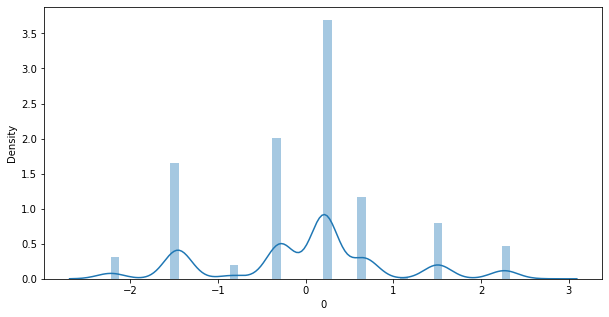

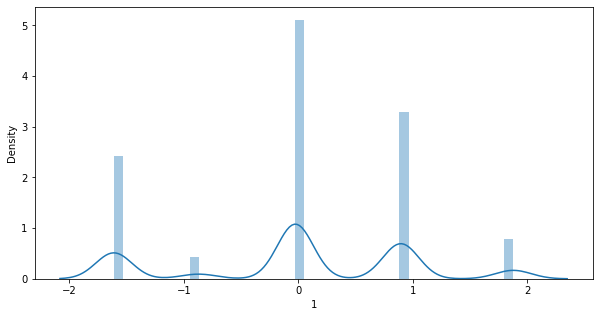

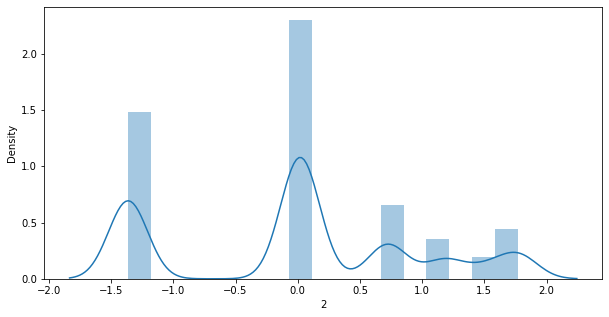

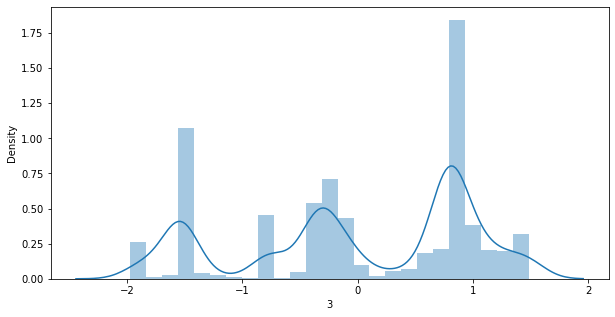

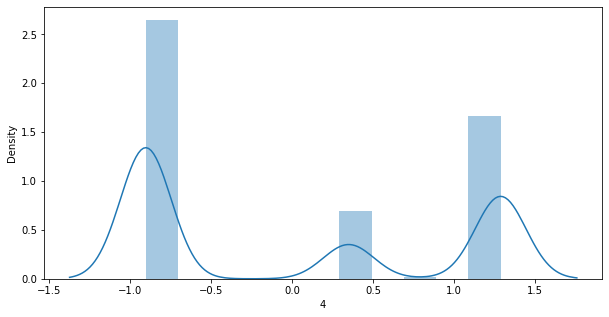

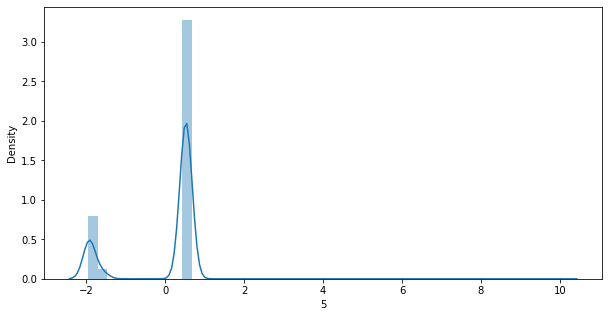

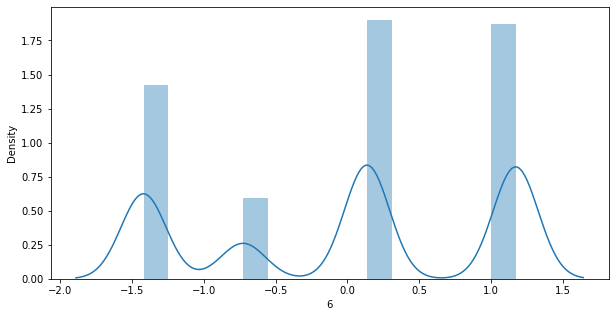

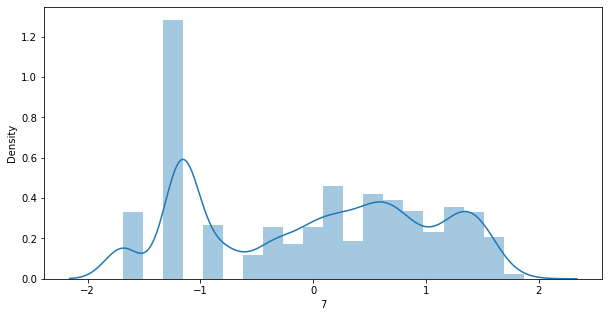

In [90]:
for i in range(8):
    plt.figure(figsize=(10,5))
    sns.distplot(df_new1[df_new1.columns[i]])
    plt.show()

skewness is under control

# Standard Scalarization:

In [91]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.28611101, -1.61080416,  1.77316412, ...,  0.52623968,
        -1.42095963, -1.16075129],
       [-1.45779864,  0.89537399, -1.36353513, ...,  0.52623968,
         0.13586008, -0.02102269],
       [ 0.21005636, -0.02576902,  0.0196569 , ...,  0.52623968,
         1.17140118,  1.08726559],
       ...,
       [ 0.21005636, -1.61080416,  0.72381217, ...,  0.52623968,
        -0.72732001, -0.81945586],
       [ 2.26488269, -1.61080416,  1.77316412, ...,  0.52623968,
        -1.42095963, -1.16075129],
       [-1.45779864, -0.02576902,  0.0196569 , ...,  0.52623968,
         0.13586008,  0.11612782]])

Now our Data is Ready for Model Building

# Model Building:

In [92]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [93]:
x.shape

(10521, 8)

In [94]:
lm=LinearRegression()
m=0
for i in range (0,10521):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.30,random_state=i)
    lm.fit(train_x,train_y)
    p=lm.score(train_x,train_y)
    if p>m:
        m=p
        n=i
print('lm.score=',m,'at random state=',n)

lm.score= 0.5052728107383181 at random state= 1835


we find the best random state state at 1835.we will creat our train_test_split using this random state

In [95]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.30,random_state=1835)

In [96]:
#cheking shape of all variable
print("train_x shape =",train_x.shape)
print("test_x shape =",test_x.shape)
print("train_y shape =",train_y.shape)
print("test_y shape =",test_y.shape)

train_x shape = (7364, 8)
test_x shape = (3157, 8)
train_y shape = (7364,)
test_y shape = (3157,)


In [97]:
lm=LinearRegression()
lm.fit(train_x,train_y)
lm.score(train_x,train_y)

0.5052728107383181

In [98]:
lm.coef_

array([ 376.52271705,  111.12330708,  257.32257996, -141.18965755,
       -460.38943873,  544.48041735, -162.05531898, 2704.07457495])

In [99]:
lm.intercept_

8854.118002215102

# Error of Llinear regression Model on our dataset

In [100]:
print('ERROR:')
from sklearn.metrics import mean_absolute_error,mean_squared_error
predlm=lm.predict(test_x)
print('Mean Absolute Error: ',mean_absolute_error(test_y,predlm))
print('Mean Squared Error: ',mean_squared_error(test_y,predlm))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(test_y,predlm)))

ERROR:
Mean Absolute Error:  2354.8294168419225
Mean Squared Error:  9328307.741752572
Root Mean Squared Error:  3054.227847059314


In [101]:
#checking r2 score
from sklearn.metrics import r2_score
print(r2_score(test_y,predlm))

0.443336003308042


In [102]:
#cross validation of the model
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lm,x,y,cv=5)
print("cross validation score of Linear Regression is =",scr.mean())

cross validation score of Linear Regression is = 0.485394339484302


In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [104]:
LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()
XGB_model= XGBRegressor()
Elastic_model= ElasticNet()
SGH_model= SGDRegressor()
Bag_model=BaggingRegressor()
ADA_model=AdaBoostRegressor()
GB_model= GradientBoostingRegressor()

In [105]:
model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model]

In [106]:
for i in model:
    p=i
    p.fit(train_x,train_y)
    print("accuracy score of",i,"is =",p.score(train_x,train_y))
    
    print("\n")
    print("#"*50)

accuracy score of LinearRegression() is = 0.5052728107383181


##################################################
accuracy score of Ridge() is = 0.5052727919092371


##################################################
accuracy score of Lasso() is = 0.5052718672050172


##################################################
accuracy score of DecisionTreeRegressor() is = 0.8794130617732774


##################################################
accuracy score of SVR() is = 0.0932858796969328


##################################################
accuracy score of KNeighborsRegressor() is = 0.836556931439187


##################################################
accuracy score of RandomForestRegressor() is = 0.8753559246197796


##################################################
accuracy score of XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
   

we get best accracy score 87% from DecisionTreeRegressor,RandomForestRegressor,XGBRegressor,BaggingRegressor

# Checking Cross Val Score:

In [107]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    print("For CV =",i)
    for m in model:
        scr=cross_val_score(m,x,y,cv=i)
        print("cross validation score of",m,"is =",scr.mean())
    print('*'*100)

For CV = 2
cross validation score of LinearRegression() is = 0.4848626080034891
cross validation score of Ridge() is = 0.4848627810694839
cross validation score of Lasso() is = 0.48486138548891705
cross validation score of DecisionTreeRegressor() is = 0.7576617130767453
cross validation score of SVR() is = 0.06177403280029775
cross validation score of KNeighborsRegressor() is = 0.7684122666794615
cross validation score of RandomForestRegressor() is = 0.7891282797447539
cross validation score of XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
     

we get best cross val score from RandomForestRegressor for cv=3

# Parameter Tuning:

In [108]:
#creating parameter list to pass in GreadSearchCV
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':["squared_error", "absolute_error", "poisson"]}
gcv1=GridSearchCV(RandomForestRegressor(),parameters,cv=3,scoring='accuracy')
gcv1.fit(train_x,train_y)
gcv1.best_params_

{'criterion': 'squared_error', 'max_depth': 4, 'max_features': 'auto'}

In [109]:
gcv1.best_estimator_

RandomForestRegressor(max_depth=4)

In [110]:
gcvpred1=gcv1.best_estimator_.predict(test_x)
gcv1.best_estimator_.score(train_x,train_y)

0.7232774537506046

# Creating Final Model:

In [111]:
final_model=RandomForestRegressor(max_depth=4)

In [112]:
final_model.fit(test_x,test_y)
pred=final_model.predict(test_x)
print("Test Accuracy=",final_model.score(test_x,test_y))

Test Accuracy= 0.6952321998023391


In [113]:
final_model.fit(train_x,train_y)
pred1=final_model.predict(train_x)
print("Train Accuracy=",final_model.score(train_x,train_y))

Train Accuracy= 0.7232014507806908


In [114]:
print('ERROR:')
from sklearn.metrics import mean_absolute_error,mean_squared_error
predlm=final_model.predict(test_x)
print('Mean Absolute Error: ',mean_absolute_error(test_y,predlm))
print('Mean Squared Error: ',mean_squared_error(test_y,predlm))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(test_y,predlm)))

ERROR:
Mean Absolute Error:  1660.8110455094995
Mean Squared Error:  5425531.480709718
Root Mean Squared Error:  2329.2770296187864


,Predicted,Original
3942,7124.016327,6093
4704,9679.055316,6587
4107,4784.015499,3898
8723,4784.015499,4823
4075,9979.765991,7354
...,...,...
8614,14512.865118,14781
3074,4784.015499,3943
1486,5783.671387,6015
8480,4683.423844,4409


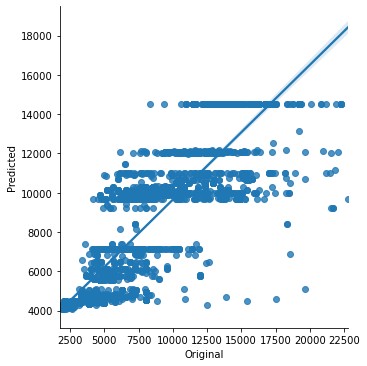

In [115]:
MLdf= pd.DataFrame({'Original':test_y, 'Predicted':pred},columns=["Predicted","Original"])
sns.lmplot(x='Original',y='Predicted',data=MLdf,palette='rainbow')
MLdf

# Model Saving:

In [116]:
#Save the final model                                                                      
import joblib                                                                                                     
#joblib.dump(final_model,'Flight Price Prediction Model.pkl')

# Import Testing Data:

In [159]:
#importing the test dataset
df=pd.read_csv("Flight Price Prediction Project(test data).csv")

In [160]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Unnamed: 10
0,Jet Airways,06-06-2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,07-06-2022 04:25,10h 55m,1 stop,No info,NaN
1,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info,NaN
2,Jet Airways,21-05-2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,22-05-2022 19:00,23h 45m,1 stop,In-flight meal not included,NaN
3,Multiple carriers,21-05-2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info,NaN
4,Air Asia,24-06-2019,Banglore,Delhi,BLR ? DEL,23:55,25-06-2022 02:45,2h 50m,non-stop,No info,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
#checking null values in the dataframe
df.isnull().sum()

Airline             8012
Date_of_Journey     8012
Source              8012
Destination         8012
Route               8012
Dep_Time            8012
Arrival_Time        8012
Duration            8012
Total_Stops         8012
Additional_Info     8012
Unnamed: 10        10683
dtype: int64

lot of missing values are in the dataframe.we have to handle it.

In [162]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          2671 non-null   object 
 1   Date_of_Journey  2671 non-null   object 
 2   Source           2671 non-null   object 
 3   Destination      2671 non-null   object 
 4   Route            2671 non-null   object 
 5   Dep_Time         2671 non-null   object 
 6   Arrival_Time     2671 non-null   object 
 7   Duration         2671 non-null   object 
 8   Total_Stops      2671 non-null   object 
 9   Additional_Info  2671 non-null   object 
 10  Unnamed: 10      0 non-null      float64
dtypes: float64(1), object(10)
memory usage: 918.2+ KB


In [163]:
df.shape

(10683, 11)

In [164]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Unnamed: 10'],
      dtype='object')

In [ ]:
#filling the Missing Value

In [165]:
df['Airline'].fillna(df['Airline'].mode()[0],inplace=True)
df['Date_of_Journey'].fillna(df['Date_of_Journey'].mode()[0],inplace=True)
df['Source'].fillna(df['Source'].mode()[0],inplace=True)
df['Destination'].fillna(df['Destination'].mode()[0],inplace=True)
df['Route'].fillna(df['Route'].mode()[0],inplace=True)
df['Dep_Time'].fillna(df['Dep_Time'].mode()[0],inplace=True)
df['Arrival_Time'].fillna(df['Arrival_Time'].mode()[0],inplace=True)
df['Duration'].fillna(df['Duration'].mode()[0],inplace=True)
df['Total_Stops'].fillna(df['Total_Stops'].mode()[0],inplace=True)
df['Additional_Info'].fillna(df['Additional_Info'].mode()[0],inplace=True)

In [166]:
#Checking Missing value after the treatment
df.isnull().sum()

Airline                0
Date_of_Journey        0
Source                 0
Destination            0
Route                  0
Dep_Time               0
Arrival_Time           0
Duration               0
Total_Stops            0
Additional_Info        0
Unnamed: 10        10683
dtype: int64

# Now do all the steps for test data:

In [167]:
#creating new column "Duration(Month)"
D=[]
for i in range(9039):
    du=df["Duration"][i].replace('m','').replace(' ','').split('h')
    
    x=float(du[0].replace('h',''))
    if len(du)==1:
        y=0
    else:
        if type(du[1])==str:
            y=0
        else:
            y=float(du[1])
        
    D.append(x*60 + y)

    
for i in range(9039,10683):
    du=df["Duration"][i].replace('m','').replace(' ','').split('h')
    
    x=float(du[0].replace('h',''))
    if len(du)==1:
        y=0
    else:
        if type(du[1])==str:
            y=0
        else:
            y=float(du[1])
        
    D.append(x*60 + y)

In [168]:
#creating new column "Journey_Month"
df["Journey_Month"]=pd.to_datetime(df["Date_of_Journey"]).dt.month

In [169]:
df['Duration(minute)']=D

In [170]:
#label Encoding
list=["Airline","Source","Destination","Route","Total_Stops","Additional_Info"]
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list:
    df[i]=le.fit_transform(df[i]).astype(float)

In [172]:
#now we are free from missing values.                         
#we drop the Unnamed: 10 column.

In [175]:
df.drop("Unnamed: 10",axis=1,inplace=True)

In [176]:
df.head(20)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Month,Duration(minute)
0,4.0,06-06-2019,2.0,1.0,76.0,17:30,07-06-2022 04:25,10h 55m,0.0,5.0,6,600.0
1,3.0,12-05-2019,3.0,0.0,65.0,06:20,10:20,4h,0.0,5.0,12,240.0
2,4.0,21-05-2019,2.0,1.0,76.0,19:15,22-05-2022 19:00,23h 45m,0.0,3.0,5,1380.0
3,6.0,21-05-2019,2.0,1.0,76.0,08:00,21:00,13h,0.0,5.0,5,780.0
4,0.0,24-06-2019,0.0,2.0,16.0,23:55,25-06-2022 02:45,2h 50m,4.0,5.0,6,120.0
5,4.0,12-06-2019,2.0,1.0,76.0,18:15,13-06-2022 12:35,18h 20m,0.0,3.0,12,1080.0
6,1.0,12-03-2019,0.0,5.0,24.0,07:30,22:35,15h 5m,0.0,5.0,12,900.0
7,3.0,01-05-2019,3.0,0.0,57.0,15:15,20:30,5h 15m,0.0,5.0,1,300.0
8,3.0,15-03-2019,3.0,0.0,43.0,10:10,12:55,2h 45m,4.0,5.0,3,120.0
9,4.0,18-05-2019,3.0,0.0,45.0,16:30,22:35,6h 5m,0.0,5.0,5,360.0


In [177]:
#drop all unnecessary columns
df=df.drop(drop_columns,axis=1)

In [179]:
df.head(20)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Month,Duration(minute)
0,4.0,2.0,1.0,76.0,0.0,5.0,6,600.0
1,3.0,3.0,0.0,65.0,0.0,5.0,12,240.0
2,4.0,2.0,1.0,76.0,0.0,3.0,5,1380.0
3,6.0,2.0,1.0,76.0,0.0,5.0,5,780.0
4,0.0,0.0,2.0,16.0,4.0,5.0,6,120.0
5,4.0,2.0,1.0,76.0,0.0,3.0,12,1080.0
6,1.0,0.0,5.0,24.0,0.0,5.0,12,900.0
7,3.0,3.0,0.0,57.0,0.0,5.0,1,300.0
8,3.0,3.0,0.0,43.0,4.0,5.0,3,120.0
9,4.0,3.0,0.0,45.0,0.0,5.0,5,360.0


In [180]:
#creating independent variable
x=df

In [185]:
x.shape

(10683, 8)

The column numbers fit our model

In [181]:
#Remove skewness
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [182]:
#standardize the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [183]:
#predict the flight price with our bestmodel 
pred=final_model.predict(x)

In [184]:
#printing the predicted flight price
pred

array([14342.84544727,  7166.62390799,  9975.69855493, ...,
       13701.32378848, 13701.32378848, 13701.32378848])

# Thank You